# Method defs EXPERT

Esta tabla contiene la información de las funciones definidas dentro de una clase (métodos) EXPERT. Cada entrada en esta tabla tiene una entrada en la tabla functiondef con el resto de información.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'methoddef__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('methoddefs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-13 16:10:23.411317 Data cache files found ...
2024-05-13 16:10:23.426310 Data cache files successfully loaded!!
The dataset contains 35666 (38.63%) instances for BEGINNER class and 56658 (61.37%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'methoddefs'
TABLE_FEATURES = ['methoddef__is_class_method', 'methoddef__is_static_method', 'methoddef__is_constructor_method', 'methoddef__is_abstract_method', 'methoddef__is_property', 'methoddef__is_wrapper', 'methoddef__is_cached']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-05-13 14:00:13.314381 Loading data ...
2024-05-13 14:00:15.493768 Data successfully load!!
2024-05-13 14:00:15.493768 Creating data cache files ...
2024-05-13 14:00:15.533772 Data cache files successfully created!!
Features shape: (92324, 8)
Target shape: (92324,)
As we can see the downloaded data contains a total of 92324 instances. Each of the instances corresponds to a program. For each program we have 8 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92324 entries, 0 to 92323
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   methoddef__is_class_method        92324 non-null  bool  
 1   methoddef__is_static_method       92324 non-null  bool  
 2   methoddef__is_constructor_method  92324 non-null  bool  
 3   methoddef__is_abstract_method     92324 non-null  bool  
 4   methoddef__is_property            92324 non-null  bool  
 5   methoddef__is_wrapper             92324 non-null  bool  
 6   methoddef__is_cached              92324 non-null  bool  
 7   methoddef__expertise_level        92324 non-null  object
dtypes: bool(7), object(1)
memory usage: 1.3+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 92324 entries, 0 to 92323
Series name: methoddef__expertise_level
Non-Null Count  Dtype 
--------------  ----- 
92324 non-null  object
dtypes: object(1)
memory usage: 721

Cómo podemos ver la tabla está compuesta por 7 variables boleanas y una de tipo objeto. Las última variable es la etiqueta de la instancia. Sin embargo, en algunas ocasiones estas últimas clases no las vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [5]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [99.98%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [6]:
X.isnull().sum()

methoddef__is_class_method          0
methoddef__is_static_method         0
methoddef__is_constructor_method    0
methoddef__is_abstract_method       0
methoddef__is_property              0
methoddef__is_wrapper               0
methoddef__is_cached                0
methoddef__expertise_level          0
dtype: int64

In [7]:
print_empty_cols(X)

methoddef__is_class_method
--------------------------
0 instancias no tienen un valor para la columna methoddef__is_class_method


methoddef__is_static_method
---------------------------
0 instancias no tienen un valor para la columna methoddef__is_static_method


methoddef__is_constructor_method
--------------------------------
0 instancias no tienen un valor para la columna methoddef__is_constructor_method


methoddef__is_abstract_method
-----------------------------
0 instancias no tienen un valor para la columna methoddef__is_abstract_method


methoddef__is_property
----------------------
0 instancias no tienen un valor para la columna methoddef__is_property


methoddef__is_wrapper
---------------------
0 instancias no tienen un valor para la columna methoddef__is_wrapper


methoddef__is_cached
--------------------
0 instancias no tienen un valor para la columna methoddef__is_cached


methoddef__expertise_level
--------------------------
0 instancias no tienen un valor para la colu

### 2.4 - Describimos los valores de las variables de la tabla.

In [8]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq
methoddef__is_class_method,92324,2,False,89407
methoddef__is_static_method,92324,2,False,90457
methoddef__is_constructor_method,92324,2,False,81042
methoddef__is_abstract_method,92324,2,False,91486
methoddef__is_property,92324,2,False,86559
methoddef__is_wrapper,92324,1,False,92324
methoddef__is_cached,92324,1,False,92324
methoddef__expertise_level,92324,2,EXPERT,56658


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [9]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['methoddef__is_class_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_static_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_constructor_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_abstract_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_property'], 10))
print(get_statistics(X_copy, ['methoddef__is_wrapper'], 10))
print(get_statistics(X_copy, ['methoddef__is_cached'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
 methoddef__is_class_method  count  percentage
                      False  89407   96.840475
                       True   2917    3.159525

 methoddef__is_static_method  count  percentage
                       False  90457   97.977774
                        True   1867    2.022226

 methoddef__is_constructor_method  count  percentage
                            False  81042   87.779992
                             True  11282   12.220008

 methoddef__is_abstract_method  count  percentage
                         False  91486   99.092327
                          True    838    0.907673

 methoddef__is_property  count  percentage
                  False  86559   93.755686
                   True   5765    6.244314

 methoddef__is_wrapper  count  percentage
                 False  92324       100.0

 methoddef__is_cached  count  percentage
                False  92324       100.0

--- TWO FEATURES ---
--- THREE FEATURES ---


No hay ni wrapper ni cached?

In [10]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (92324, 9)
Target shape: (92324,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

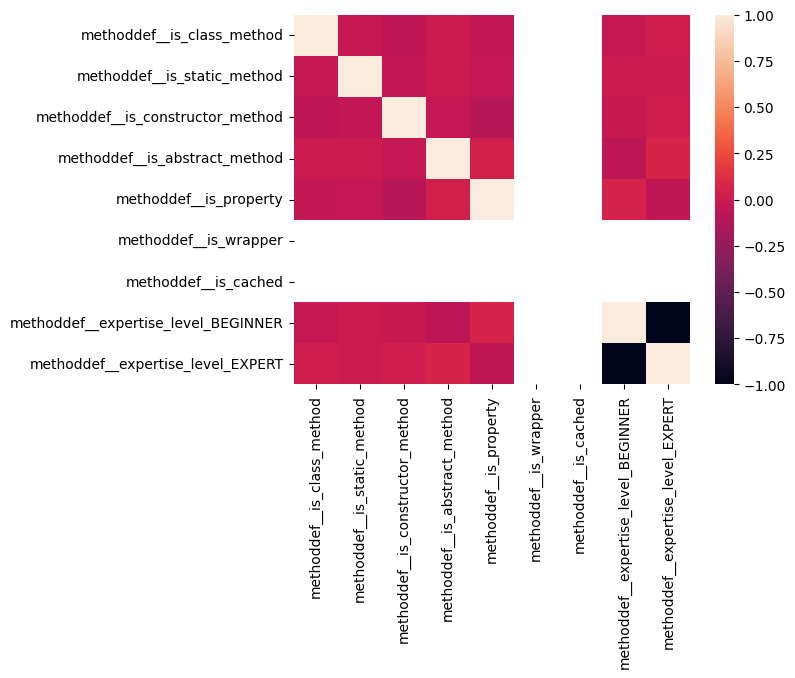

In [11]:
sns.heatmap(X.corr(), annot=False)

No parece haber relación entre ninguna variable.

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 10 variable (3 booleanas, 4 porcentuales y 3 numericas) se hara un analisis detallado 

### Variable is_class_method (1/11)
Esta variable es de tipo booleano y representa si el método es de clase.

<Axes: xlabel='methoddef__is_class_method', ylabel='Count'>

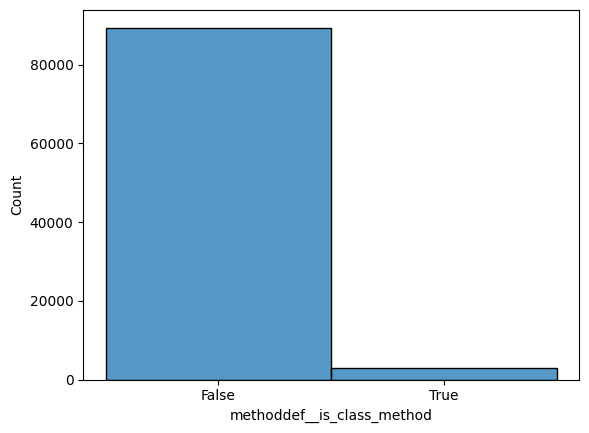

In [12]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_class_method'], discrete=True)

In [13]:
num_true_values = len(X[X['methoddef__is_class_method'] == True])
num_false_values = len(X[X['methoddef__is_class_method'] == False])
std = X['methoddef__is_class_method'].std()
freq_true = len(X[X['methoddef__is_class_method'] == True]) / len(X['methoddef__is_class_method'])
freq_false = len(X[X['methoddef__is_class_method'] == False]) / len(X['methoddef__is_class_method'])
print(f'La variable is_class_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a False es {freq_false}.')

La variable is_class_method contiene 2917 valores verdaderos y 89407 valores falsos. Y, la desviación típica es de 0.17492090165615082
La frecuencia con la que programa puede tener la variable is_class_method a True es 0.03159525150556735.
La frecuencia con la que programa puede tener la variable is_class_method a False es 0.9684047484944327.


In [14]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_class_method', possible_values)

La variable methoddef__is_class_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_class_method toma el valor de 0.0 en un 96.84% de los items.
La variable methoddef__is_class_method toma el valor de 1.0 en un 3.16% de los items.


In [15]:
X[X['methoddef__is_class_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT
count,2917.0,2917.0,2917.0,2917.000000,2917.0,2917.0,2917.0,2917.000000,2917.000000
mean,1.0,0.0,0.0,0.005142,0.0,0.0,0.0,0.310250,0.689750
std,0.0,0.0,0.0,0.071537,0.0,0.0,0.0,0.462675,0.462675
min,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000
75%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,1.000000
max,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000


### Variable is_static_method (2/11)
Esta variable es de tipo booleano y representa si el método es estático.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

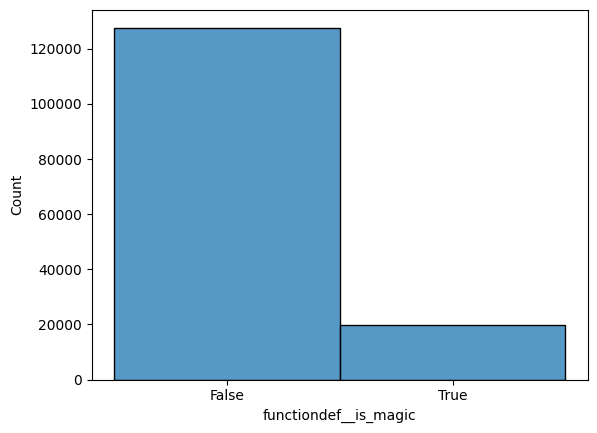

In [30]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_static_method'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_static_method'] == True])
num_false_values = len(X[X['methoddef__is_static_method'] == False])
std = X['methoddef__is_static_method'].std()
freq_true = len(X[X['methoddef__is_static_method'] == True]) / len(X['methoddef__is_static_method'])
freq_false = len(X[X['methoddef__is_static_method'] == False]) / len(X['methoddef__is_static_method'])
print(f'La variable is_static_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a False es {freq_false}.')

La variable is_static_method contiene 1867 valores verdaderos y 90457 valores falsos. Y, la desviación típica es de 0.14076055586338043
La frecuencia con la que programa puede tener la variable is_static_method a True es 0.020222260733937004.
La frecuencia con la que programa puede tener la variable is_static_method a False es 0.979777739266063.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_static_method', possible_values)

La variable methoddef__is_static_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_static_method toma el valor de 0.0 en un 97.98% de los items.
La variable methoddef__is_static_method toma el valor de 1.0 en un 2.022% de los items.


In [18]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['methoddef__is_static_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT
count,1867.0,1867.0,1867.0,1867.000000,1867.0,1867.0,1867.0,1867.000000,1867.000000
mean,0.0,1.0,0.0,0.004285,0.0,0.0,0.0,0.368506,0.631494
std,0.0,0.0,0.0,0.065337,0.0,0.0,0.0,0.482529,0.482529
min,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000
75%,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.000000,1.000000
max,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000


### Variable is_constructor_method (3/11)
Esta variable es booleana y representa si el método es un constructor (__ init __).

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

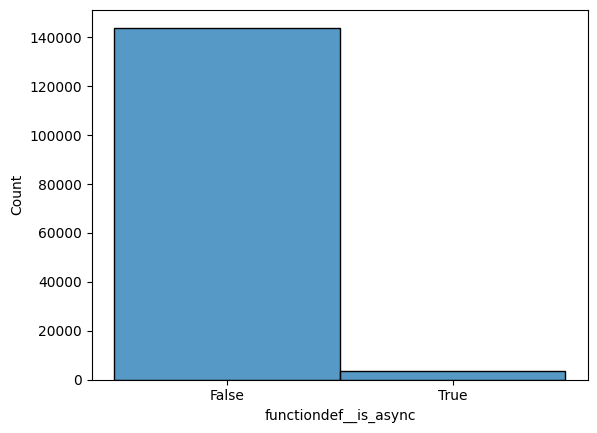

In [34]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_constructor_method'], discrete=True)

In [35]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_constructor_method'] == True])
num_false_values = len(X[X['methoddef__is_constructor_method'] == False])
std = X['methoddef__is_constructor_method'].std()
freq_true = len(X[X['methoddef__is_constructor_method'] == True]) / len(X['methoddef__is_constructor_method'])
freq_false = len(X[X['methoddef__is_constructor_method'] == False]) / len(X['methoddef__is_constructor_method'])
print(f'La variable is_constructor_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a False es {freq_false}.')

La variable is_async contiene 3607 valores verdaderos y 144020 valores falsos. Y, la desviación típica es de 0.154390349984169
La frecuencia con la que programa puede tener la variable is_async a True es 0.02443319988890921.
La frecuencia con la que programa puede tener la variable is_async a False es 0.9755668001110908.


In [20]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_constructor_method', possible_values)

La variable methoddef__is_constructor_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_constructor_method toma el valor de 0.0 en un 87.78% de los items.
La variable methoddef__is_constructor_method toma el valor de 1.0 en un 12.22% de los items.


In [19]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['methoddef__is_constructor_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT
count,11282.0,11282.0,11282.0,11282.000000,11282.0,11282.0,11282.0,11282.000000,11282.000000
mean,0.0,0.0,1.0,0.000620,0.0,0.0,0.0,0.363145,0.636855
std,0.0,0.0,0.0,0.024902,0.0,0.0,0.0,0.480927,0.480927
min,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,1.000000
75%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.000000
max,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,1.000000,1.000000


### Variable is_abstract_method (4/11)
Esta variable es booleana y representa si el método es abstracto.

<Axes: xlabel='methoddef__is_abstract_method', ylabel='Count'>

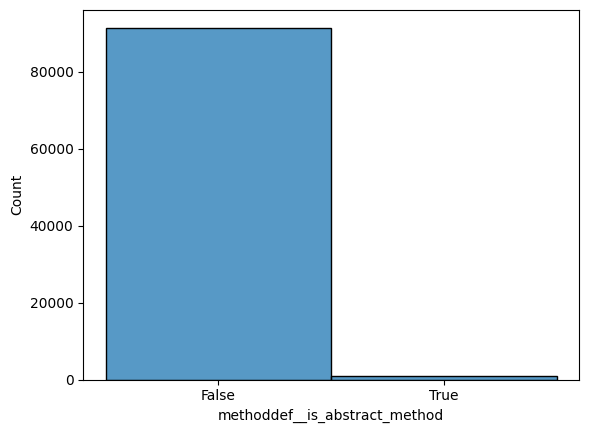

In [22]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_abstract_method'], discrete=True)

In [21]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_abstract_method'] == True])
num_false_values = len(X[X['methoddef__is_abstract_method'] == False])
std = X['methoddef__is_abstract_method'].std()
freq_true = len(X[X['methoddef__is_abstract_method'] == True]) / len(X['methoddef__is_abstract_method'])
freq_false = len(X[X['methoddef__is_abstract_method'] == False]) / len(X['methoddef__is_abstract_method'])
print(f'La variable is_abstract_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a False es {freq_false}.')

La variable is_abstract_method contiene 838 valores verdaderos y 91486 valores falsos. Y, la desviación típica es de 0.09483902156352997
La frecuencia con la que programa puede tener la variable is_abstract_method a True es 0.009076729777739266.
La frecuencia con la que programa puede tener la variable is_abstract_method a False es 0.9909232702222608.


In [24]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_abstract_method', possible_values)

La variable methoddef__is_abstract_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_abstract_method toma el valor de 0.0 en un 99.09% de los items.
La variable methoddef__is_abstract_method toma el valor de 1.0 en un 0.9077% de los items.


In [25]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['methoddef__is_abstract_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT
count,838.000000,838.000000,838.000000,838.0,838.000000,838.0,838.0,838.000000,838.000000
mean,0.017900,0.009547,0.008353,1.0,0.146778,0.0,0.0,0.060859,0.939141
std,0.132666,0.097297,0.091068,0.0,0.354096,0.0,0.0,0.239215,0.239215
min,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.0,1.000000,0.0,0.0,1.000000,1.000000


### Variable is_property (5/11)
Esta variable es booleana y representa si el método es property.

<Axes: xlabel='methoddef__is_property', ylabel='Count'>

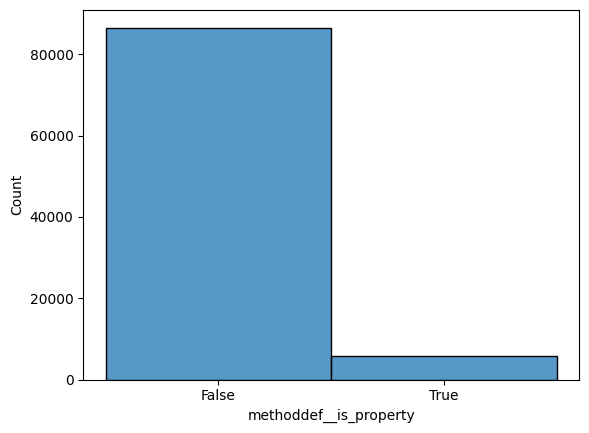

In [26]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_property'], discrete=True)

In [27]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_property'] == True])
num_false_values = len(X[X['methoddef__is_property'] == False])
std = X['methoddef__is_property'].std()
freq_true = len(X[X['methoddef__is_property'] == True]) / len(X['methoddef__is_property'])
freq_false = len(X[X['methoddef__is_property'] == False]) / len(X['methoddef__is_property'])
print(f'La variable is_property contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_property a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_property a False es {freq_false}.')

La variable is_property contiene 5765 valores verdaderos y 86559 valores falsos. Y, la desviación típica es de 0.24195995926856995
La frecuencia con la que programa puede tener la variable is_property a True es 0.06244313504614185.
La frecuencia con la que programa puede tener la variable is_property a False es 0.9375568649538581.


In [28]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_property', possible_values)

La variable methoddef__is_property contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_property toma el valor de 0.0 en un 93.76% de los items.
La variable methoddef__is_property toma el valor de 1.0 en un 6.244% de los items.


In [29]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['methoddef__is_property'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT
count,5765.0,5765.0,5765.0,5765.000000,5765.0,5765.0,5765.0,5765.000000,5765.000000
mean,0.0,0.0,0.0,0.021336,1.0,0.0,0.0,0.494709,0.505291
std,0.0,0.0,0.0,0.144513,0.0,0.0,0.0,0.500015,0.500015
min,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.000000
50%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,1.000000
75%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.000000,1.000000
max,0.0,0.0,0.0,1.000000,1.0,0.0,0.0,1.000000,1.000000


### Variable is_wrapper (5/11)
Esta variable es booleana y representa si el método es wrapper.

<Axes: xlabel='methoddef__is_wrapper', ylabel='Count'>

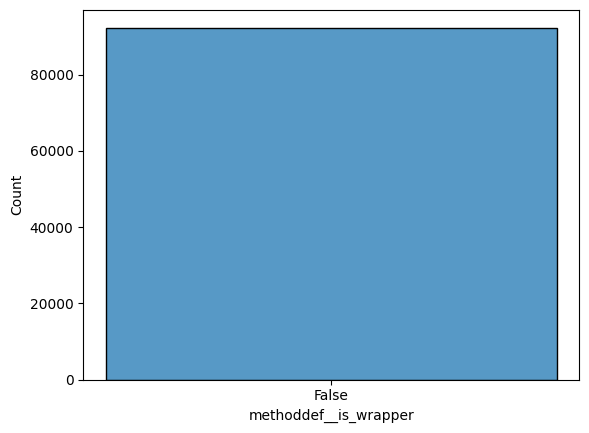

In [31]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_wrapper'], discrete=True)

In [30]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_wrapper'] == True])
num_false_values = len(X[X['methoddef__is_wrapper'] == False])
std = X['methoddef__is_wrapper'].std()
freq_true = len(X[X['methoddef__is_wrapper'] == True]) / len(X['methoddef__is_wrapper'])
freq_false = len(X[X['methoddef__is_wrapper'] == False]) / len(X['methoddef__is_wrapper'])
print(f'La variable is_wrapper contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a False es {freq_false}.')

La variable is_wrapper contiene 0 valores verdaderos y 92324 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_wrapper a True es 0.0.
La frecuencia con la que programa puede tener la variable is_wrapper a False es 1.0.


In [33]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_wrapper', possible_values)

La variable methoddef__is_wrapper contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_wrapper toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_wrapper toma el valor de True en un 0.0% de los items. [OUTLIER]


In [32]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['methoddef__is_wrapper'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable is_cached (5/11)
Esta variable es booleana y representa si el método es cached.

<Axes: xlabel='methoddef__is_cached', ylabel='Count'>

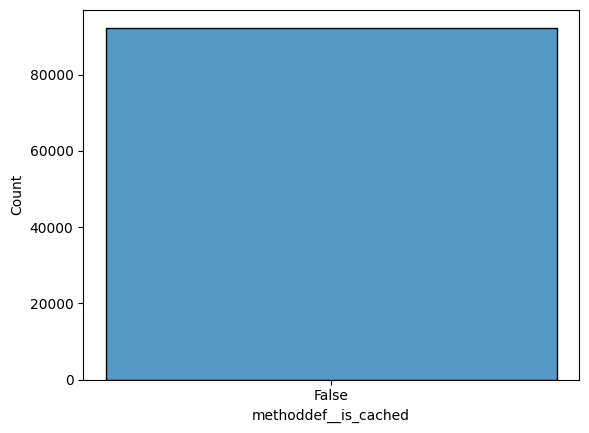

In [35]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_cached'], discrete=True)

In [34]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_cached'] == True])
num_false_values = len(X[X['methoddef__is_cached'] == False])
std = X['methoddef__is_cached'].std()
freq_true = len(X[X['methoddef__is_cached'] == True]) / len(X['methoddef__is_cached'])
freq_false = len(X[X['methoddef__is_cached'] == False]) / len(X['methoddef__is_cached'])
print(f'La variable is_cached contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_cached a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_cached a False es {freq_false}.')

La variable is_cached contiene 0 valores verdaderos y 92324 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_cached a True es 0.0.
La frecuencia con la que programa puede tener la variable is_cached a False es 1.0.


In [36]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_cached', possible_values)

La variable methoddef__is_cached contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_cached toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_cached toma el valor de True en un 0.0% de los items. [OUTLIER]


In [37]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['methoddef__is_cached'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_EXPERT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
